# **Data Extraction - Behavioral Interview type Data**

**Extracting Data from Pdf**

In [ ]:
#mounting google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install python-docx

In [ ]:
from docx import Document
import pandas as pd
import re

def extract_data_from_word(doc_path):
    doc = Document(doc_path)
    data = []
    full_text = '\n'.join([para.text for para in doc.paragraphs if para.text])

    # Split the text by "Question X" to separate each question block
    questions = re.split(r"(Question\s+\d+)", full_text)[1:]  # Skip the first element which is before the first "Question X"
    # Combine split parts as they are alternating question labels and content
    question_texts = [f"{questions[i]} {questions[i+1]}" for i in range(0, len(questions), 2)]

    for question in question_texts:
        data.append({'QuestionBlock': question.strip()})

    return data

# Specify the path to your Word document
doc_path = '/content/drive/My Drive/5. Behavioral_HR Interview Questions.docx'
extracted_data = extract_data_from_word(doc_path)

# Convert to DataFrame
df = pd.DataFrame(extracted_data)

# Save DataFrame to CSV
csv_path = '/content/drive/My Drive/extracted_questions.csv'
df.to_csv(csv_path, index=False)

# Print the DataFrame to check the output
print(df.head())


                                       QuestionBlock
0  Question 1 : Tell me about yourself.\nTRAPS: B...
1  Question 2 \tWhat are your greatest strengths?...
2  Question 1 , you know how to do this.\nPrior t...
3  Question 3 \tWhat are your greatest weaknesses...
4  Question 4 \tTell me about something you did –...


In [ ]:
pip install openpyxl


In [ ]:
from docx import Document
import pandas as pd
import re

def extract_data_from_word(doc_path):
    doc = Document(doc_path)
    data = []
    full_text = '\n'.join([para.text for para in doc.paragraphs if para.text])

    # Split the text by "Question X" to separate each question block
    questions = re.split(r"(Question\s+\d+)", full_text)[1:]  # Skip the first element which is before the first "Question X"
    # Combine split parts as they are alternating question labels and content
    question_texts = [f"{questions[i]} {questions[i+1]}" for i in range(0, len(questions), 2)]

    for question in question_texts:
        data.append({'QuestionBlock': question.strip()})

    return data

# Specify the path to your Word document
doc_path = '/content/drive/My Drive/5. Behavioral_HR Interview Questions.docx'
extracted_data = extract_data_from_word(doc_path)

# Convert to DataFrame
df = pd.DataFrame(extracted_data)

# Save DataFrame to an Excel file
excel_path = '/content/drive/My Drive/extracted_questions.xlsx'
df.to_excel(excel_path, index=False)

# Print the DataFrame to check the output
print(df.head())


                                       QuestionBlock
0  Question 1 : Tell me about yourself.\nTRAPS: B...
1  Question 2 \tWhat are your greatest strengths?...
2  Question 1 , you know how to do this.\nPrior t...
3  Question 3 \tWhat are your greatest weaknesses...
4  Question 4 \tTell me about something you did –...


# **Data Cleaning**

In [ ]:
# import necessary libraries
# import libraries for data handling, google drive integration, and mounting google drive
import pandas as pd
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [ ]:
# this command will prompt to authorize colab to access your google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  load the dataset directly from the drive

file_path = '/content/drive/MyDrive/Behavioural_dataset.xlsx'

In [ ]:
# read the excel file using pandas
behavioral_df = pd.read_excel(file_path)

In [ ]:
# display the first few rows to understand the data
print(behavioral_df.head())

   No          Domain Difficulty                Question_Type  \
0   1  Data Analytics     Medium  Behavioral(Domain-Specific)   
1   2  Data Analytics     Medium  Behavioral(Domain-Specific)   
2   3  Data Analytics       Easy  Behavioral(Domain-Specific)   
3   4  Data Analytics       Easy  Behavioral(Domain-Specific)   
4   5  Data Analytics       Easy  Behavioral(Domain-Specific)   

                                              Source  \
0  https://365datascience.com/career-advice/job-i...   
1  https://365datascience.com/career-advice/job-i...   
2  https://365datascience.com/career-advice/job-i...   
3  https://365datascience.com/career-advice/job-i...   
4  https://365datascience.com/career-advice/job-i...   

                                            Question  \
0  As a data analyst, you’ll often work with stak...   
1  Tell me about a time you and your team were su...   
2  Why do you think creativity is essential for a...   
3  What are the most critical skills a data anal

In [ ]:
#checking for null values
pd.set_option('display.max_rows', None)
null_values = behavioral_df.isnull().sum()
print(null_values)

No                 0
Domain             1
Difficulty         1
Question_Type      1
Source             0
Question           0
Tip               54
Answer1           37
Answer2          188
Answer3          195
Citation         203
dtype: int64


In [ ]:
len(behavioral_df)

203

In [ ]:
# apply fillna without using chained assignment
behavioral_df['Tip'] = behavioral_df['Tip'].fillna('No tip provided')
behavioral_df['Answer1'] = behavioral_df['Answer1'].fillna('No answer provided')


In [ ]:
# example of dropping columns with high number of missing values if deemed unnecessary
behavioral_df.drop(columns=['Answer2', 'Answer3', 'Citation'], inplace=True)

# display the dataframe to confirm the column has been removed
print(behavioral_df.head())


   No          Domain Difficulty                Question_Type  \
0   1  Data Analytics     Medium  Behavioral(Domain-Specific)   
1   2  Data Analytics     Medium  Behavioral(Domain-Specific)   
2   3  Data Analytics       Easy  Behavioral(Domain-Specific)   
3   4  Data Analytics       Easy  Behavioral(Domain-Specific)   
4   5  Data Analytics       Easy  Behavioral(Domain-Specific)   

                                              Source  \
0  https://365datascience.com/career-advice/job-i...   
1  https://365datascience.com/career-advice/job-i...   
2  https://365datascience.com/career-advice/job-i...   
3  https://365datascience.com/career-advice/job-i...   
4  https://365datascience.com/career-advice/job-i...   

                                            Question  \
0  As a data analyst, you’ll often work with stak...   
1  Tell me about a time you and your team were su...   
2  Why do you think creativity is essential for a...   
3  What are the most critical skills a data anal

In [ ]:
#checking for null values
pd.set_option('display.max_rows', None)
null_values = behavioral_df.isnull().sum()
print(null_values)

No               0
Domain           1
Difficulty       1
Question_Type    1
Source           0
Question         0
Tip              0
Answer1          0
dtype: int64


In [ ]:
# import pandas library
import pandas as pd

# set options to display full content in a DataFrame
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.max_colwidth', None)  # Display full content of each cell

# assuming 'behavioral_df' is your DataFrame
# filter rows where any of the specified columns have null values
missing_values_df = behavioral_df[behavioral_df['Domain'].isnull() | behavioral_df['Difficulty'].isnull() | behavioral_df['Question_Type'].isnull()]

# display the row with missing values (specifically for index 11 as per your data)
print(missing_values_df.loc[[11]])


    No Domain Difficulty Question_Type  \
11  12    NaN        NaN           NaN   

                                                                                             Source  \
11  https://365datascience.com/career-advice/job-interview-tips/data-architect-interview-questions/   

                                                                                Question  \
11  How would you assess your performance with these data architect interview questions?   

                                                                                                                                                                                                                                                                     Tip  \
11  This is a question you should answer openly. Generally, you would know if you performed well or if your interview was a disaster. If you address your performance issues, you might get an opportunity to answer additional questions that could help your 

In [ ]:
# Locate the row where 'No' equals 12 and update the specified columns
behavioral_df.loc[behavioral_df['No'] == 12, 'Domain'] = 'Data Architect'
behavioral_df.loc[behavioral_df['No'] == 12, 'Difficulty'] = 'Medium'
behavioral_df.loc[behavioral_df['No'] == 12, 'Question_Type'] = 'Behavioral(Domain-Specific)'

# Display the updated row to confirm changes
print(behavioral_df.loc[behavioral_df['No'] == 12])


    No          Domain Difficulty                Question_Type  \
11  12  Data Architect     Medium  Behavioral(Domain-Specific)   

                                                                                             Source  \
11  https://365datascience.com/career-advice/job-interview-tips/data-architect-interview-questions/   

                                                                                Question  \
11  How would you assess your performance with these data architect interview questions?   

                                                                                                                                                                                                                                                                     Tip  \
11  This is a question you should answer openly. Generally, you would know if you performed well or if your interview was a disaster. If you address your performance issues, you might get an opportunity to a

In [ ]:
#checking for null values
pd.set_option('display.max_rows', None)
null_values = behavioral_df.isnull().sum()
print(null_values)

No               0
Domain           0
Difficulty       0
Question_Type    0
Source           0
Question         0
Tip              0
Answer1          0
dtype: int64


In [ ]:
#checking for duplicate rows
duplicates = behavioral_df.duplicated().sum()
print(f"The number of duplicate rows = {duplicates}")

The number of duplicate rows = 0


In [ ]:
# check for duplicate rows based on the 'Question' column
duplicates_in_questions = behavioral_df['Question'].duplicated().sum()
print(f"Number of duplicate rows based on 'Question' column = {duplicates_in_questions}")


Number of duplicate rows based on 'Question' column = 0


# **Text Data Preprocessing**

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to convert text to lowercase using SpaCy
def convert_to_lowercase(text):
    return nlp(text).text.lower()

# Convert all text columns to lowercase
text_columns = ['Domain', 'Difficulty', 'Question_Type', 'Source', 'Question', 'Tip', 'Answer1']  # add or adjust columns as necessary
for column in text_columns:
    behavioral_df[column] = behavioral_df[column].fillna('').apply(convert_to_lowercase)

# Display the updated DataFrame
print(behavioral_df.head())


   No          Domain Difficulty                Question_Type  \
0   1  data analytics     medium  behavioral(domain-specific)   
1   2  data analytics     medium  behavioral(domain-specific)   
2   3  data analytics       easy  behavioral(domain-specific)   
3   4  data analytics       easy  behavioral(domain-specific)   
4   5  data analytics       easy  behavioral(domain-specific)   

                                                                                          Source  \
0  https://365datascience.com/career-advice/job-interview-tips/data-analyst-interview-questions/   
1  https://365datascience.com/career-advice/job-interview-tips/data-analyst-interview-questions/   
2  https://365datascience.com/career-advice/job-interview-tips/data-analyst-interview-questions/   
3  https://365datascience.com/career-advice/job-interview-tips/data-analyst-interview-questions/   
4  https://365datascience.com/career-advice/job-interview-tips/data-analyst-interview-questions/   

        

In [ ]:
!pip install contractions


In [ ]:
#Expanding Contractions-"you'll": "you will"

import contractions
import pandas as pd

def expand_contractions(text):
    # Use the contractions package to expand contractions in the text
    expanded_text = contractions.fix(text)
    return expanded_text

# Assuming 'behavioral_df' is your DataFrame and it is already loaded
# Apply the expand_contractions function to the text columns you are interested in
behavioral_df['Question'] = behavioral_df['Question'].apply(expand_contractions)
behavioral_df['Tip'] = behavioral_df['Tip'].apply(expand_contractions)
behavioral_df['Answer1'] = behavioral_df['Answer1'].apply(expand_contractions)

# Display the updated DataFrame to check the changes
print(behavioral_df[['Question', 'Tip', 'Answer1']].head())


                                                                                                                                                                                                                       Question  \
0  as a data analyst, you will often work with stakeholders who lack technical background and a deeper understanding of data and databases. have you ever been in a situation like this, and how did you handle this challenge?   
1                                                                                                                                            tell me about a time you and your team were surprised by the results of a project.   
2                                                                                                                why do you think creativity is essential for a data analyst? how have you used creative thinking in your work?   
3                                                                            what are the mo

In [ ]:
#tokenization-For creating embeddings or performing other types of text analysis

import spacy
import pandas as pd

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to tokenize text using SpaCy
def tokenize_text(text):
    doc = nlp(text)
    # Extract tokens from the doc and return them
    tokens = [token.text for token in doc]
    return tokens

# Apply the tokenize_text function to the text columns in the DataFrame
behavioral_df['Question_tokens'] = behavioral_df['Question'].apply(tokenize_text)
behavioral_df['Tip_tokens'] = behavioral_df['Tip'].apply(tokenize_text)
behavioral_df['Answer1_tokens'] = behavioral_df['Answer1'].apply(tokenize_text)

# Display the DataFrame to verify tokenization
print(behavioral_df[['Question_tokens', 'Tip_tokens', 'Answer1_tokens']].head())


                                                                                                                                                                                                                                                               Question_tokens  \
0  [as, a, data, analyst, ,, you, will, often, work, with, stakeholders, who, lack, technical, background, and, a, deeper, understanding, of, data, and, databases, ., have, you, ever, been, in, a, situation, like, this, ,, and, how, did, you, handle, this, challenge, ?]   
1                                                                                                                                                                       [tell, me, about, a, time, you, and, your, team, were, surprised, by, the, results, of, a, project, .]   
2                                                                                                                                      [why, do, you, think, creativity, is, essen

In [ ]:
#removing punctuation, extra spaces, newlines, and keeping only alphabetic words (removing unwanted symbols and numbers)
import pandas as pd
import re

def clean_text(text):
    # Remove newlines and extra spaces
    text = re.sub('\s+', ' ', text)  # Replace multiple spaces with a single space
    # Remove everything except alphabetic characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    # Strip any leading/trailing whitespace that may have been left
    text = text.strip()
    return text

# Apply the clean_text function to the text columns in the DataFrame
behavioral_df['Question'] = behavioral_df['Question'].apply(clean_text)
behavioral_df['Tip'] = behavioral_df['Tip'].apply(clean_text)
behavioral_df['Answer1'] = behavioral_df['Answer1'].apply(clean_text)

# Display the first two rows of the DataFrame to verify the cleaning
print(behavioral_df[['Question', 'Tip', 'Answer1']].head(2))


                                                                                                                                                                                                                   Question  \
0  as a data analyst you will often work with stakeholders who lack technical background and a deeper understanding of data and databases have you ever been in a situation like this and how did you handle this challenge   
1                                                                                                                                         tell me about a time you and your team were surprised by the results of a project   

                                                                                                                                                                                                                                                                                                                                          

In [ ]:
#lemmatization
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# List of technical terms with custom lemmatization rules
custom_lemmas = {
    'data': 'data',
    'databases': 'database',
    'analysts': 'analyst',
    # Add more terms as necessary
}

def custom_lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = []
    for token in doc:
        # Check if the lowercased token is in the custom lemmas dictionary
        if token.text.lower() in custom_lemmas:
            lemma = custom_lemmas[token.text.lower()]
        else:
            lemma = token.lemma_

        if token.is_alpha and not token.is_stop:
            lemmatized_tokens.append(lemma)
    return " ".join(lemmatized_tokens)

# Test the function
sample_text = "Data analysts process large databases effectively."
print(custom_lemmatize_text(sample_text))


data analyst process large database effectively


In [ ]:
behavioral_df['Question'] = behavioral_df['Question'].apply(custom_lemmatize_text)
behavioral_df['Tip'] = behavioral_df['Tip'].apply(custom_lemmatize_text)
behavioral_df['Answer1'] = behavioral_df['Answer1'].apply(custom_lemmatize_text)

# Display the updated DataFrame to verify custom lemmatization
print(behavioral_df[['Question', 'Tip', 'Answer1']].head(2))


                                                                                                                   Question  \
0  data analyst work stakeholder lack technical background deep understanding data database situation like handle challenge   
1                                                                                    tell time team surprise result project   

                                                                                                                                                                                                                                                                                                                                   Tip  \
0  data analyst need help communicate finding coworker different department senior management limited understanding data require excellent skill interpret specific term nontechnical language demand extra patience listen coworker question provide answer easytodig manner interviewer work e

In [ ]:
#checking for data consistency
# Check for unique values in categorical columns to ensure consistency
print("Unique Difficulty Levels:", behavioral_df['Difficulty'].unique())
print("Unique Question Types:", behavioral_df['Question_Type'].unique())


Unique Difficulty Levels: ['medium' 'easy' 'hard']
Unique Question Types: ['behavioral(domain-specific)' 'behavioral (genric)']


In [ ]:
#Identify and Handle Outliers
import numpy as np

# Assuming there's a numerical column, for example 'Response Length'
behavioral_df['Response Length'] = behavioral_df['Answer1'].apply(len)

Q1 = behavioral_df['Response Length'].quantile(0.25)
Q3 = behavioral_df['Response Length'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = behavioral_df[(behavioral_df['Response Length'] < lower_bound) | (behavioral_df['Response Length'] > upper_bound)]
print("Outliers based on response length:")
print(outliers)


Outliers based on response length:
      No            Domain Difficulty                Question_Type  \
125  126  data engineering       hard  behavioral(domain-specific)   
132  133  data engineering       hard  behavioral(domain-specific)   
133  134  data engineering       hard  behavioral(domain-specific)   
134  135  data engineering       hard  behavioral(domain-specific)   
135  136  data engineering       hard  behavioral(domain-specific)   
136  137  data engineering       hard  behavioral(domain-specific)   
137  138  data engineering       hard  behavioral(domain-specific)   
153  154    data analytics     medium  behavioral(domain-specific)   
156  157    data analytics     medium  behavioral(domain-specific)   
157  158    data analytics     medium  behavioral(domain-specific)   

                                                                                                              Source  \
125        https://medium.com/@seancoyne/preparing-for-the-data-engineerin

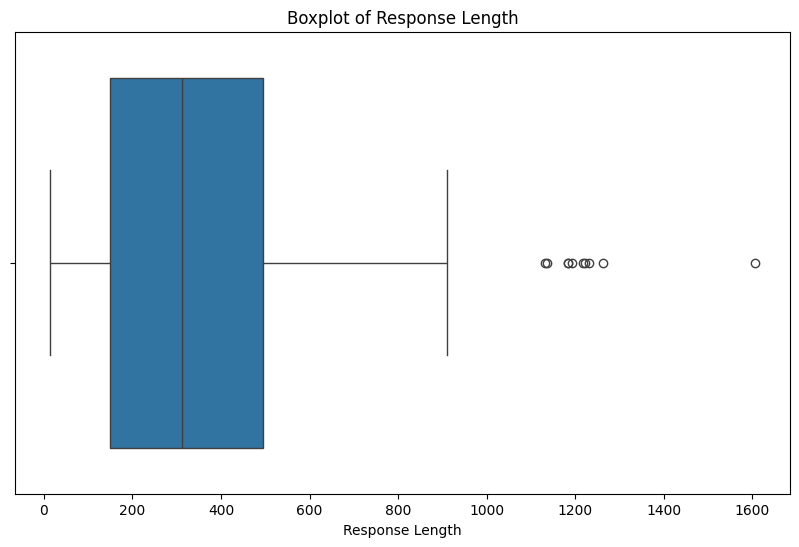

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot to visualize outliers in 'Response Length'
plt.figure(figsize=(10, 6))
sns.boxplot(x=behavioral_df['Response Length'])
plt.title('Boxplot of Response Length')
plt.show()


There are multiple outliers beyond 1000 words, with some exceeding 1600 words.
These might indicate overly long or unstructured responses that could be reviewed for conciseness.

In [ ]:
# Define the path where you want to store your CSV file in Google Drive
file_path = '/content/drive/My Drive/behavioral_Cleaned.csv'

# Save the DataFrame to CSV
behavioral_df.to_csv(file_path, index=False)


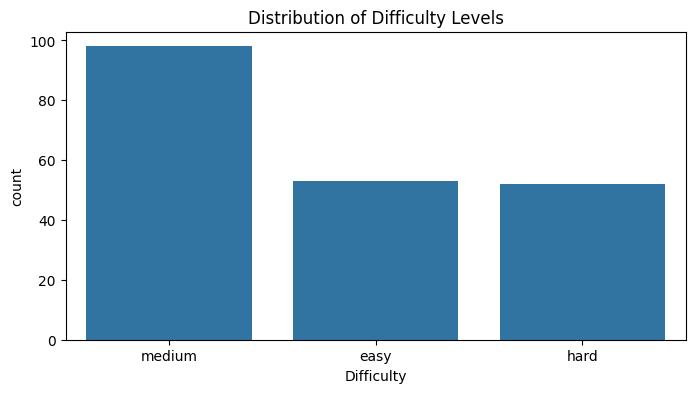

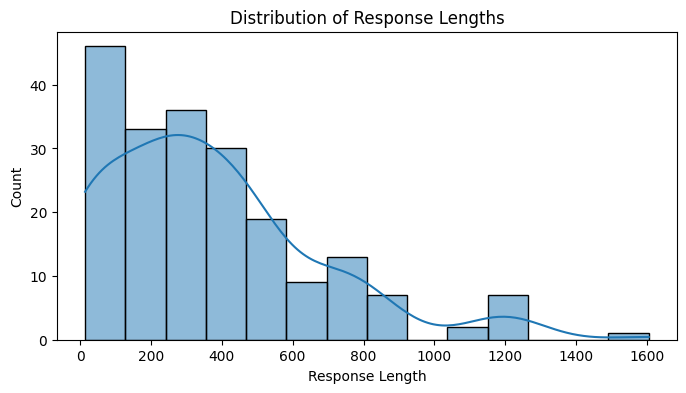

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Difficulty' feature
plt.figure(figsize=(8, 4))
sns.countplot(x='Difficulty', data=behavioral_df)
plt.title('Distribution of Difficulty Levels')
plt.show()

# If you have numerical data such as response lengths:
behavioral_df['Response Length'] = behavioral_df['Answer1'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(behavioral_df['Response Length'], kde=True)
plt.title('Distribution of Response Lengths')
plt.show()


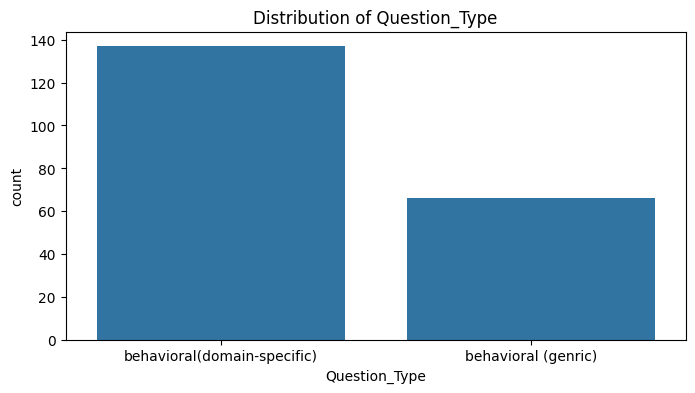

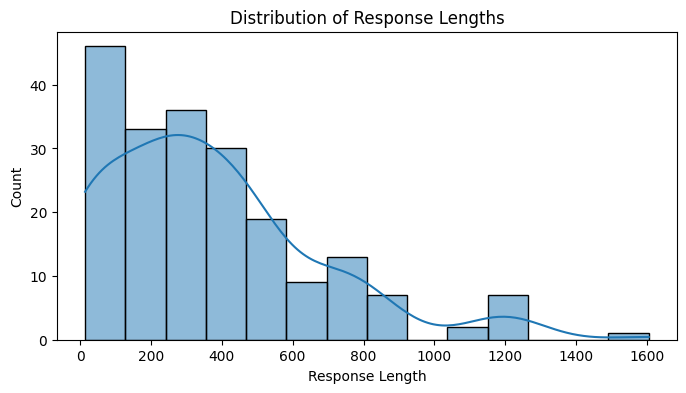

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Question_Type' feature
plt.figure(figsize=(8, 4))
sns.countplot(x='Question_Type', data=behavioral_df)
plt.title('Distribution of Question_Type')
plt.show()

# If you have numerical data such as response lengths:
behavioral_df['Response Length'] = behavioral_df['Answer1'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(behavioral_df['Response Length'], kde=True)
plt.title('Distribution of Response Lengths')
plt.show()


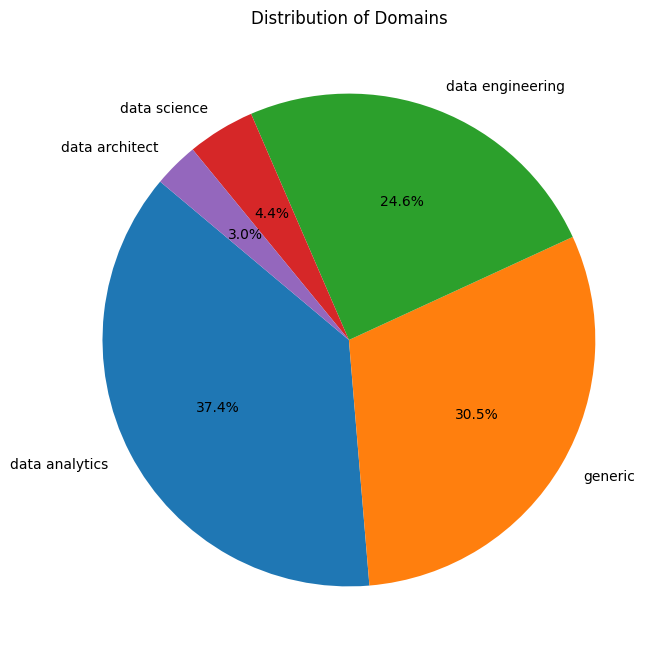

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each domain
domain_counts = behavioral_df['Domain'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Domains')
plt.show()


         Word  Frequency
8        data        338
57       team        153
23    project        149
0        work        116
100      task         90
641    ensure         73
175      time         66
29       need         63
33    provide         63
41    company         61
74     result         52
648      sale         51
43        new         48
70       help         46
78      issue         44
5      answer         44
37   analysis         38
671     model         38
77   identify         37
307    change         37


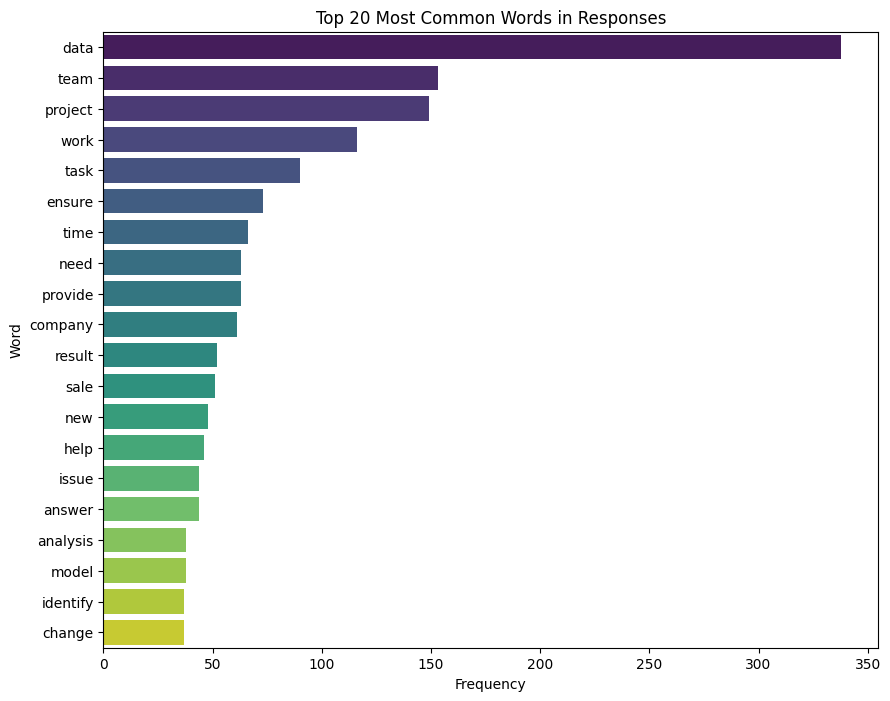

In [ ]:
#word frequency analysis
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Combine all responses into one large string
all_responses = ' '.join(behavioral_df['Answer1'].dropna())

# Tokenize the string into words
words = all_responses.split()

# Count the frequency of each word
word_counts = Counter(words)

# Convert to a DataFrame for easier handling
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the most common words
print(word_freq_df.head(20))

# Plot the top 20 most common words
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', hue='Word', data=word_freq_df.head(20), palette='viridis', legend=False)
plt.title('Top 20 Most Common Words in Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()



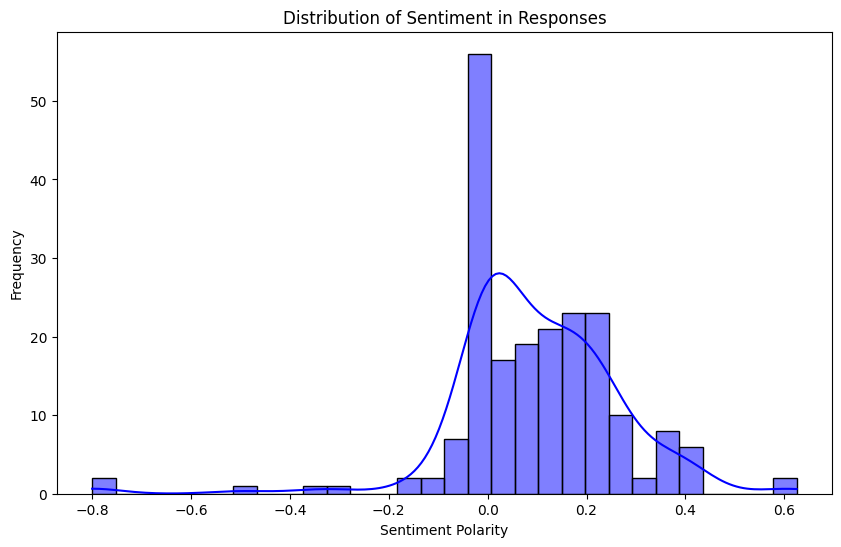

In [ ]:
#Sentiment Analysis
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each response
behavioral_df['Sentiment'] = behavioral_df['Answer1'].apply(calculate_sentiment)

# Plot the distribution of sentiment
plt.figure(figsize=(10, 6))
sns.histplot(behavioral_df['Sentiment'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment in Responses')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


The sharp peak around 0.0 sentiment polarity suggests that most responses are neutral.
This is expected in structured interview answers where responses are factual rather than highly emotional.

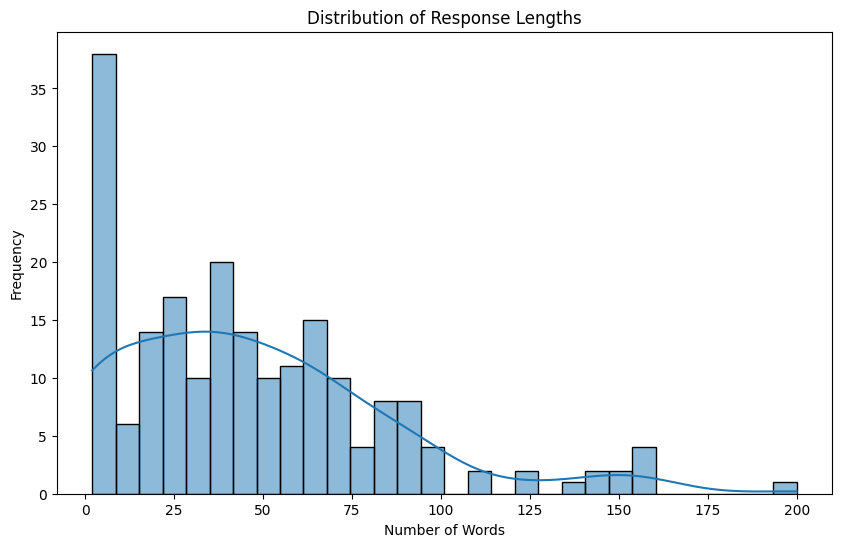

In [ ]:
# Calculate the length of each response
behavioral_df['Response Length'] = behavioral_df['Answer1'].apply(lambda x: len(x.split()))

# Plot the distribution of response lengths
plt.figure(figsize=(10, 6))
sns.histplot(behavioral_df['Response Length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Many answers are short ranging 0 to 10 words.

# **Audio Data Preprocessing and transformation**

In [ ]:
#mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Print File Names from sample audio Folder
import os

def list_audio_files(input_dir):
    """
    Lists all WAV audio files in the given directory.

    Args:
        input_dir (str): path to folder containing input audio files
    """
    audio_files = [f for f in os.listdir(input_dir) if f.lower().endswith('.wav')]

    print("found", len(audio_files), "audio files:")
    for name in audio_files:
        print("-", name)

# updated folder path
input_folder = '/content/drive/MyDrive/298A_AudioSamples'
list_audio_files(input_folder)


found 16 audio files:
- P5.wav
- P1.wav
- P15.wav
- P8.wav
- P20.wav
- P7.wav
- P13.wav
- P11.wav
- P12.wav
- P4.wav
- P16.wav
- P17.wav
- P6.wav
- P3.wav
- P14.wav
- P10.wav


In [ ]:
!pip install noisereduce

In [ ]:
#Noise Reduction
#Apply spectral gating noise reduction

#Save the denoised output in a new folder:
#/content/drive/MyDrive/298A_AudioSamples/denoised_audio
import os
import librosa
import soundfile as sf
import noisereduce as nr

def reduce_noise_in_audio(input_dir, output_subfolder='denoised_audio'):
    """
    Applies basic noise reduction to all WAV files in a directory.
    Saves the denoised files in a new folder inside the same directory.

    Args:
        input_dir (str): path to folder with original audio
        output_subfolder (str): name of subfolder for denoised output
    """

    output_dir = os.path.join(input_dir, output_subfolder)
    os.makedirs(output_dir, exist_ok=True)

    for filename in os.listdir(input_dir):
        if filename.lower().endswith('.wav'):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            try:
                # load audio at original sample rate
                audio_data, sample_rate = librosa.load(input_path, sr=None)

                # apply noise reduction
                reduced_audio = nr.reduce_noise(y=audio_data, sr=sample_rate)

                # save denoised output
                sf.write(output_path, reduced_audio, sample_rate)

            except Exception as e:
                print(f"error processing {filename}:\n{e}")

# example usage
input_folder = '/content/drive/MyDrive/298A_AudioSamples'
reduce_noise_in_audio(input_folder)


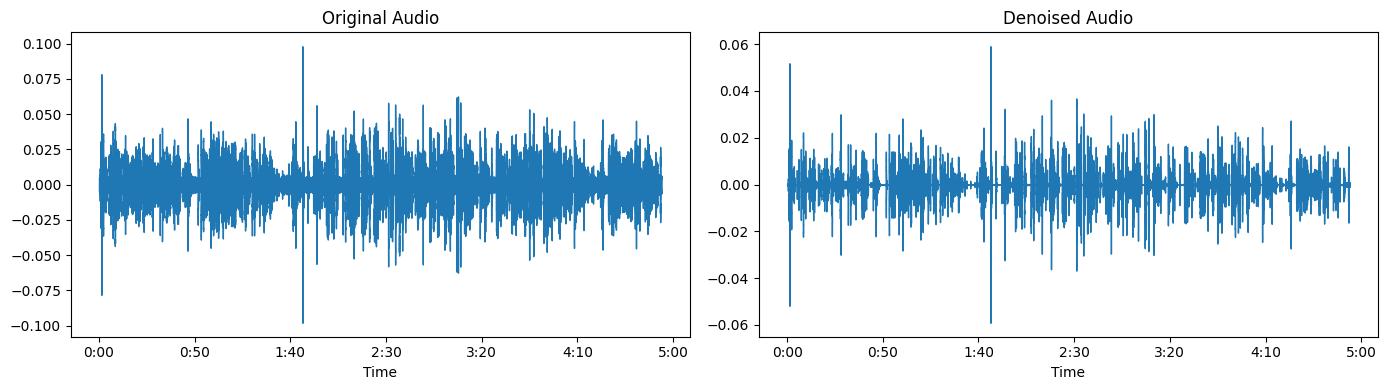

In [ ]:
#Plot Waveform (Before & After)-noise reduction

import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# choose a sample filename (must exist in both folders)
sample_name = 'P13.wav'

# define paths
original_path = '/content/drive/MyDrive/298A_AudioSamples/' + sample_name
denoised_path = '/content/drive/MyDrive/298A_AudioSamples/denoised_audio/' + sample_name

# load both versions
original_audio, sr = librosa.load(original_path, sr=None)
denoised_audio, _ = librosa.load(denoised_path, sr=None)

# plot waveforms
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(original_audio, sr=sr)
plt.title('Original Audio')

plt.subplot(1, 2, 2)
librosa.display.waveshow(denoised_audio, sr=sr)
plt.title('Denoised Audio')

plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import Audio, display

# choose a sample filename (must exist in both folders)
sample_name = 'P13.wav'

# define paths
original_path = '/content/drive/MyDrive/298A_AudioSamples/' + sample_name
denoised_path = '/content/drive/MyDrive/298A_AudioSamples/denoised_audio/' + sample_name

# play original
print("Original Audio:")
display(Audio(original_path))

# play denoised
print("Denoised Audio:")
display(Audio(denoised_path))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Volume Normalization
#Load each denoised .wav file

#Normalize volume to a consistent loudness (e.g., -20 dBFS)

!pip install pydub
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
import os
from pydub import AudioSegment

def match_target_amplitude(audio_segment, target_dBFS):
    """
    Normalize an audio segment to the target loudness level.

    Args:
        audio_segment (AudioSegment): input audio
        target_dBFS (float): desired loudness (e.g., -20.0)
    Returns:
        AudioSegment: normalized audio
    """
    change_in_dBFS = target_dBFS - audio_segment.dBFS
    return audio_segment.apply_gain(change_in_dBFS)

def normalize_audio_volume(input_dir, output_subfolder='normalized_audio', target_dBFS=-20.0):
    """
    Normalizes volume of all WAV files in a directory and saves them to a new folder.

    Args:
        input_dir (str): path to folder with denoised audio files
        output_subfolder (str): name of folder to store normalized output
        target_dBFS (float): target loudness in dBFS
    """
    output_dir = os.path.join(os.path.dirname(input_dir), output_subfolder)
    os.makedirs(output_dir, exist_ok=True)

    for filename in os.listdir(input_dir):
        if filename.lower().endswith('.wav'):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            try:
                # load audio
                audio = AudioSegment.from_wav(input_path)

                # apply volume normalization
                normalized_audio = match_target_amplitude(audio, target_dBFS)

                # export normalized audio
                normalized_audio.export(output_path, format='wav')

            except Exception as e:
                print(f"error processing {filename}:\n{e}")

# example usage
denoised_folder = '/content/drive/MyDrive/298A_AudioSamples/denoised_audio'
normalize_audio_volume(denoised_folder)


In [ ]:
#Listen to All Versions (Play Audio)
from IPython.display import Audio, display

base_dir = '/content/drive/MyDrive/298A_AudioSamples/'

print("Original:")
display(Audio(base_dir + 'P13.wav'))

print("Denoised:")
display(Audio(base_dir + 'denoised_audio/P13.wav'))

print("Normalized:")
display(Audio(base_dir + 'normalized_audio/P13.wav'))


Output hidden; open in https://colab.research.google.com to view.

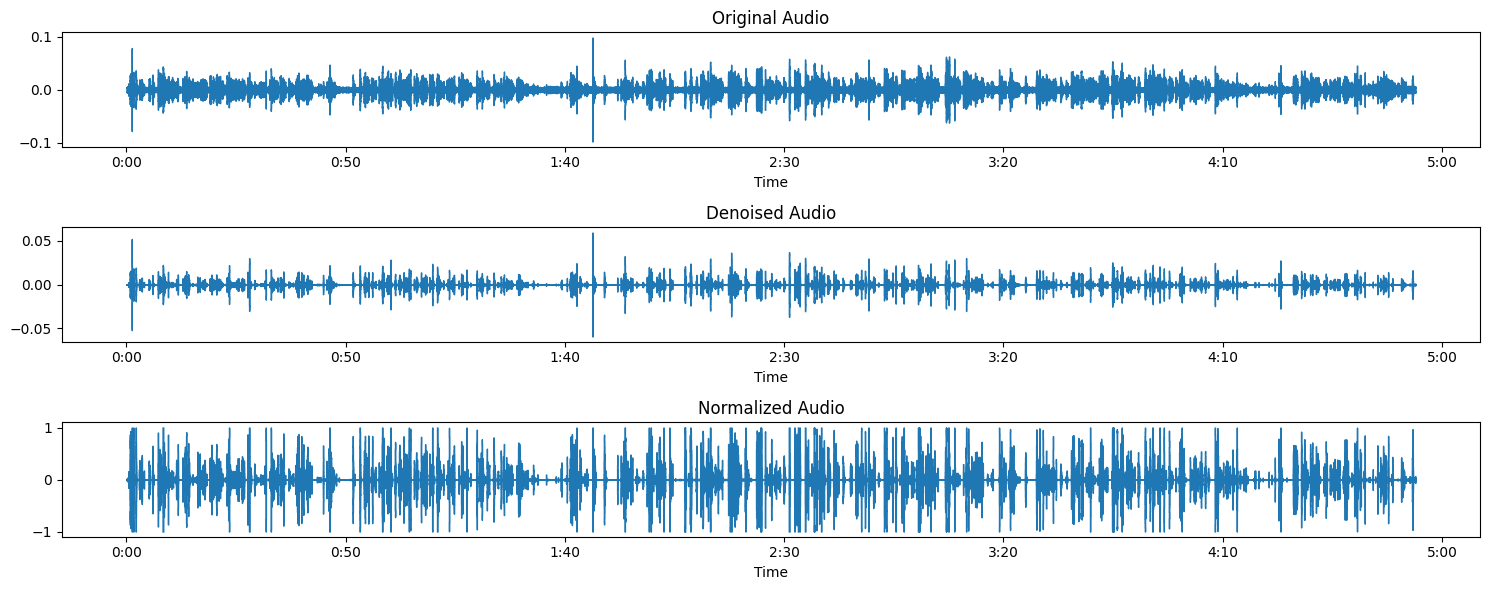

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform(file_path, title, sr=None):
    audio, sr = librosa.load(file_path, sr=sr)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    return audio

plt.figure(figsize=(15, 6))

plt.subplot(3, 1, 1)
plot_waveform(base_dir + 'P13.wav', 'Original Audio')

plt.subplot(3, 1, 2)
plot_waveform(base_dir + 'denoised_audio/P13.wav', 'Denoised Audio')

plt.subplot(3, 1, 3)
plot_waveform(base_dir + 'normalized_audio/P13.wav', 'Normalized Audio')

plt.tight_layout()
plt.show()


In [ ]:
#Securely Enter Your API Key in Colab
import openai
import getpass

# prompt you to enter your OpenAI API key securely
openai.api_key = getpass.getpass("Enter your OpenAI API key: ")


Enter your OpenAI API key: ··········


In [ ]:
#Downsample & Compress
from pydub import AudioSegment

# input and output paths
input_path = '/content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13.wav'
output_path = '/content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13_smaller.wav'

# load original audio
audio = AudioSegment.from_wav(input_path)

# resample to 16kHz, mono, 16-bit
audio = audio.set_frame_rate(16000).set_channels(1).set_sample_width(2)

# export compressed version
audio.export(output_path, format='wav')

print("Saved smaller version:", output_path)


Saved smaller version: /content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13_smaller.wav


In [ ]:
#File Size Comparison (Original vs Compressed)
import os

# define paths
original_path = '/content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13.wav'
compressed_path = '/content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13_smaller.wav'

# get sizes in bytes
original_size = os.path.getsize(original_path)
compressed_size = os.path.getsize(compressed_path)

# convert to MB (2 decimal places)
original_mb = round(original_size / (1024 * 1024), 2)
compressed_mb = round(compressed_size / (1024 * 1024), 2)

# print result
print(" File Size Comparison (P13.wav):")
print(f"- Original:   {original_mb} MB  ({original_size} bytes)")
print(f"- Compressed: {compressed_mb} MB  ({compressed_size} bytes)")
print(f"Size reduced by: {round(original_mb - compressed_mb, 2)} MB")


 File Size Comparison (P13.wav):
- Original:   26.92 MB  (28224044 bytes)
- Compressed: 8.97 MB  (9408044 bytes)
Size reduced by: 17.95 MB


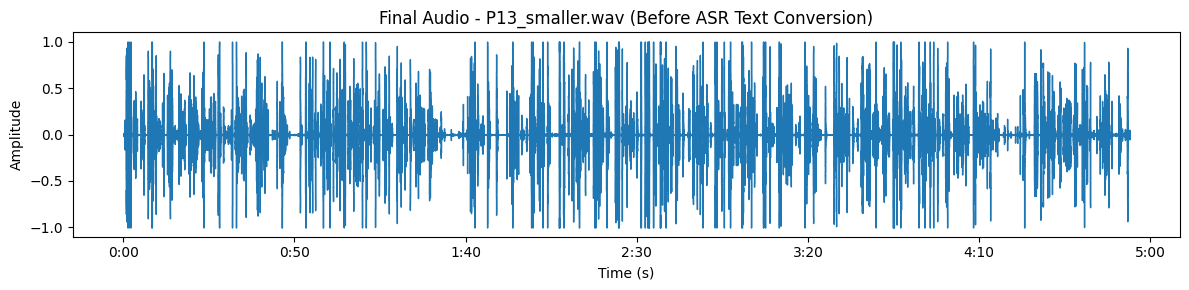

In [ ]:
#Final Audio Before Text Conversion (P13_smaller.wav)
import librosa
import librosa.display
import matplotlib.pyplot as plt

# path to final audio just before transcription
final_audio_path = '/content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13_smaller.wav'

# load audio
final_audio, sr = librosa.load(final_audio_path, sr=None)

# plot waveform
plt.figure(figsize=(12, 3))
librosa.display.waveshow(final_audio, sr=sr)
plt.title("Final Audio - P13_smaller.wav (Before ASR Text Conversion)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [ ]:
#Transcribe Audio Using OpenAI Whisper API

# updated audio path
small_audio_path = '/content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13_smaller.wav'

# run Whisper transcription
with open(small_audio_path, 'rb') as audio_file:
    transcript = openai.audio.transcriptions.create(
        model="whisper-1",
        file=audio_file,
        response_format="text"
    )

print("\n Transcription:\n")

# split into smaller readable parts
for line in transcript.strip().split('. '):
    if line.strip():
        print("- " + line.strip() + '.')




 Transcription:

- How are you doing today? Good.
- Good.
- So why don't you tell me about yourself.
- Okay.
- I'm currently a junior at MIT studying electrical engineering and computer science.
- I first became interested in engineering in high school.
- That's when I worked in the lab at the material science lab at UC Berkeley.
- And since then, I've worked at a variety of different places, including labs and in the industry, including electrical engineering labs here and at Stanford, and Comix Industries, which is a chip packaging company.
- So how about a time you demonstrated leadership? In high school, I was part of the school orchestra, and I played bassoon.
- I was the principal bassoon player, so that means I was in charge of the bassoon section.
- So basically, I ran practices for the center section outside of the orchestra get-together practice.
- I coordinated that.
- I also set up events between different sections so members would get to know each other and we could pract

In [ ]:
import openai
import getpass


# updated audio path
small_audio_path = '/content/drive/MyDrive/298A_AudioSamples/normalized_audio/P13_smaller.wav'

# run Whisper transcription
with open(small_audio_path, 'rb') as audio_file:
    transcript = openai.audio.transcriptions.create(
        model="whisper-1",
        file=audio_file,
        response_format="text"
    )

# show result
print("Transcription:")
print(transcript)


Transcription:
How are you doing today? Good. Good. So why don't you tell me about yourself. Okay. I'm currently a junior at MIT studying electrical engineering and computer science. I first became interested in engineering in high school. That's when I worked in the material science lab at UC Berkeley. And since then, I've worked at a variety of different places, including labs and in the industry, including electrical engineering labs here and at Stanford, and Comix Industries, which is a chip packaging company. So how about a time you demonstrated leadership? In high school, I was part of the school orchestra, and I played bassoon. I was the principal bassoon player, so that means I was in charge of the bassoon section. So basically, I ran practices for the center section outside of the orchestra get-together practice. I coordinated that. I also set up events between different sections so members would get to know each other and we could practice together and things like that. Okay.

In [ ]:
# ground truth from MIT label
ground_truth_text = """
Interviewer: How are you doing today?|Interviewee: Good.|Interviewer: Good. So  why don't you tell me about yourself?|Interviewee: Ok  umm  I'm currently a junior at M.I.T. studying electrical engineering and computer science. Umm  I first became interested in engineering in high school  I guess  when I worked in a lab at  a material science lab  at U.C. Berkley. Umm  and since then I've worked at a variety of different places including labs and at  uh  and in the industry including electrical engineering labs here  and at Standford  and umm Promex Industries  which is a chip packaging company in the silicon valley.|Interviewer: So  tell me about a time you demonstrated leadership.|Interviewee: Umm  in high school I was part of the school orchestra and I played bassoon. I was the principle bassoon there. So  that means I was in charge of the bassoon section. So basically  umm  I ran extra  I ran practices for  within our section outside of  uh   when the orchestra would get together and practice.|Interviewer: Mm Hm.|Interviewee: I coordinated that. I also  uh  set up events between the woodwind sections to  uh you know  so people would get to know each other and  you know  we could practice together and things like that.|Interviewer: Great. Ok. Tell me about time you were working on a team and faced a challenge. How did you solve that problem?|Interviewee: Umm  this past summer I worked in Spain. Umm  in operations research and I was part of a research group there. Umm  it was  so  we had  uh  within our team  it was  communicating with each other was the biggest challenge because my Spanish isn't so great and their English wasn't so great.|Interviewer: Mm hm.|Interviewee: So  umm  what we ended  we basically communicated through like  the papers  through the papers we read  umm  we  well  one thing that helped was  we both got  like everyone  they got better at speaking English  I got better at understanding them. I guess they got better at understanding my Spanish also. So  we were able to communicate by just  you know  talking really slowly  repeating everything a couple times. Umm  we also did a lot of technical things and so those were mostly related to technical papers and things like that. Those were written mostly in English  so that was  that wasn't so much of a problem for me...but...it made it  because they were working in the area already and I was new to the area  looking through these made it easier for me to understand what my role was  what I was supposed to do. Umm  things like that.|Interviewer: Ok  great.  Can you tell me about one of your weaknesses and what you were doing to overcome it?|Interviewee: umm  well  one thing right now is that I can get really hung up on small details and  uh  it becomes a problem because its  it can be distracting and cause me to lose sight of  like  the big picture. But since coming to M.I.T. I've been  I've been involved in a lot of classes  a lot of activites and things and that's forced me to manage my time better.  So  now that  uh  like  I have  because I have a lot of time constraints  I'm forced to finish a project or assignment or whatever  and I can't  I can't get caught up in  like  little things that don't ultimately make a big a difference. So  um  by being forced to manage my time more  I'm  uh  overcoming this problem.|Interviewer: Great  ok. So  why do you think we should hire you?|Interviewee: Well  I have the  I have the quantitative and qualitative skills necessary to accomplish  uh  accomplish project goals and get things done. Uh  I can solve problems and  and can work pretty well in a team.|Interviewer: Ok|Interviewee: I'm also very interested in what this company does  and  um  I'd really like to work there.|Interviewer: Great!
"""

# whisper output from API
whisper_output_text = """
How are you doing today? Good. Good. So why don't you tell me about yourself. Okay. I'm currently a junior at MIT studying electrical engineering and computer science. I first became interested in engineering in high school. That's when I worked in the material science lab at UC Berkeley. And since then, I've worked at a variety of different places, including labs and in the industry, including electrical engineering labs here and at Stanford, and Comix Industries, which is a chip packaging company. So how about a time you demonstrated leadership? In high school, I was part of the school orchestra, and I played bassoon. I was the principal bassoon player, so that means I was in charge of the bassoon section. So basically, I ran practices for the center section outside of the orchestra get-together practice. I coordinated that. I also set up events between different sections so members would get to know each other and we could practice together and things like that. Okay. How about a time you were working on a team and faced a challenge? How did you solve that problem? This past summer, I worked in Spain in operations research, and I was part of a research group there. So within our team, communicating with each other was the biggest challenge because my Spanish isn't so great and their English wasn't so great. So we basically communicated through the papers we read. Well, one thing that helped was they got better at speaking English. I got better at understanding English. They got better at understanding my Spanish also. So we were able to communicate by just talking really slowly, repeating everything multiple times. Also, we did a lot of technical things. So those were mostly related to technical papers and things like that. Those were written mostly in English, so that wasn't so much of a problem for me. But because we were working together, not three times a week together yet, looking through these made it easier for me to understand what my role was, what I was supposed to do, things like that. Okay, great. Can you tell me about one of your weaknesses in what you were doing together? Well, one thing right now is that I can get really hung up on small details. And it becomes a problem because it can be distracting and can cause me to lose my focus. But since coming to MIT, I've been involved in a lot of classes, a lot of activities and things, and it has forced me to manage my time better. So because I have a lot of time disturbance, I'm forced to finish a project or an assignment or whatever, and I can't get caught up in little things that don't ultimately make a difference. So by being forced to manage my time more, I'm overcoming this problem. Great. Okay. What do you think we should hire you? Well, I have the quantitative and qualitative skills necessary to accomplish project goals and get things done. I can solve problems and can work pretty well in a team. I'm also very interested in what someone like you does, and I would really like to work with you. Great.
"""

# print both neatly
print("\n Ground Truth Transcript:\n")
print(ground_truth_text.strip())

print("\n Whisper Transcript:\n")
print(whisper_output_text.strip())



 Ground Truth Transcript:

Interviewer: How are you doing today?|Interviewee: Good.|Interviewer: Good. So  why don't you tell me about yourself?|Interviewee: Ok  umm  I'm currently a junior at M.I.T. studying electrical engineering and computer science. Umm  I first became interested in engineering in high school  I guess  when I worked in a lab at  a material science lab  at U.C. Berkley. Umm  and since then I've worked at a variety of different places including labs and at  uh  and in the industry including electrical engineering labs here  and at Standford  and umm Promex Industries  which is a chip packaging company in the silicon valley.|Interviewer: So  tell me about a time you demonstrated leadership.|Interviewee: Umm  in high school I was part of the school orchestra and I played bassoon. I was the principle bassoon there. So  that means I was in charge of the bassoon section. So basically  umm  I ran extra  I ran practices for  within our section outside of  uh   when the orc

# **Excel to CSV file conversion**

In [ ]:
#mounting google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  load the dataset directly from the drive

file_path = '/content/drive/MyDrive/Behavioural_dataset.xlsx'

In [ ]:
# import necessary libraries
# import libraries for data handling, google drive integration, and mounting google drive
import pandas as pd
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [ ]:
# read the excel file using pandas
behavioral_df = pd.read_excel(file_path)

In [ ]:
# display the first few rows to understand the data
print(behavioral_df.head())

   No          Domain Difficulty                Question_Type  \
0   1  Data Analytics     Medium  Behavioral(Domain-Specific)   
1   2  Data Analytics     Medium  Behavioral(Domain-Specific)   
2   3  Data Analytics       Easy  Behavioral(Domain-Specific)   
3   4  Data Analytics       Easy  Behavioral(Domain-Specific)   
4   5  Data Analytics       Easy  Behavioral(Domain-Specific)   

                                              Source  \
0  https://365datascience.com/career-advice/job-i...   
1  https://365datascience.com/career-advice/job-i...   
2  https://365datascience.com/career-advice/job-i...   
3  https://365datascience.com/career-advice/job-i...   
4  https://365datascience.com/career-advice/job-i...   

                                            Question  \
0  As a data analyst, you’ll often work with stak...   
1  Tell me about a time you and your team were su...   
2  Why do you think creativity is essential for a...   
3  What are the most critical skills a data anal

In [ ]:
# Drop the unnecessary columns
behavioral_df = behavioral_df.drop(columns=['Answer2', 'Answer3', 'Citation'])

# Rename 'Answer1' to 'Answer'
behavioral_df = behavioral_df.rename(columns={'Answer1': 'Answer'})

# Save the cleaned DataFrame to CSV
csv_path = "/content/drive/MyDrive/behavioral_data_original.csv"
behavioral_df.to_csv(csv_path, index=False)

# Optional: display the first few rows
print(behavioral_df.head())

   No          Domain Difficulty                Question_Type  \
0   1  Data Analytics     Medium  Behavioral(Domain-Specific)   
1   2  Data Analytics     Medium  Behavioral(Domain-Specific)   
2   3  Data Analytics       Easy  Behavioral(Domain-Specific)   
3   4  Data Analytics       Easy  Behavioral(Domain-Specific)   
4   5  Data Analytics       Easy  Behavioral(Domain-Specific)   

                                              Source  \
0  https://365datascience.com/career-advice/job-i...   
1  https://365datascience.com/career-advice/job-i...   
2  https://365datascience.com/career-advice/job-i...   
3  https://365datascience.com/career-advice/job-i...   
4  https://365datascience.com/career-advice/job-i...   

                                            Question  \
0  As a data analyst, you’ll often work with stak...   
1  Tell me about a time you and your team were su...   
2  Why do you think creativity is essential for a...   
3  What are the most critical skills a data anal

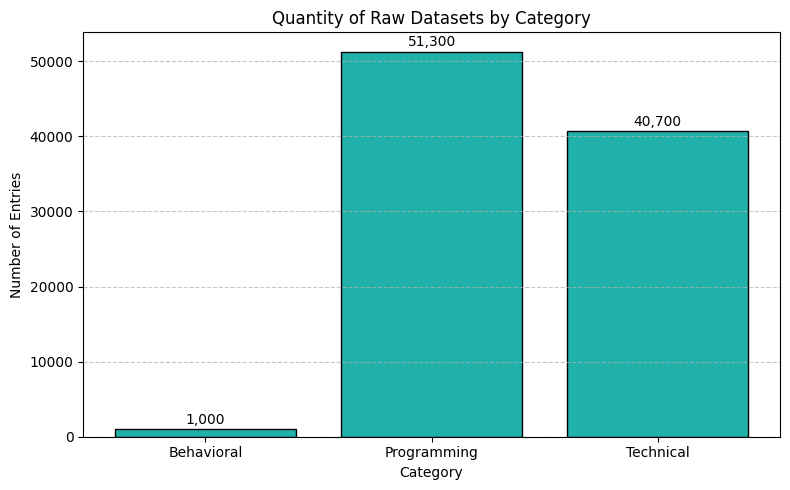

In [ ]:
import matplotlib.pyplot as plt

# Data (rounded to total = 93,000)
categories = ['Behavioral', 'Programming', 'Technical']
counts = [1000, 51300, 40700]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color='lightseagreen', edgecolor='black')

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, f'{yval:,}', ha='center', va='bottom', fontsize=10)

plt.title('Quantity of Raw Datasets by Category')
plt.xlabel('Category')
plt.ylabel('Number of Entries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#loading all text data combined raw file into dataframe

In [1]:
#loading all text data combined raw file into dataframe
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#Load the Raw CSV file
import pandas as pd

file_path = '/content/drive/MyDrive/Copy of final_df_all_types.csv'
df = pd.read_csv(file_path)

# Display first few rows
df.head()


<ipython-input-2-7b38a1e00f11>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Unnamed: 0,Question,Input,Answer,Source,Domain,Company,Level,question_length,answer_length,question_length_clipped,answer_length_clipped,question_length_clipped1,answer_length_clipped1
0,0,"AI, ML and Data Science",NaN,"In Microsoft Excel, a cell address is used for...",TPointTech Excel,Excel,NaN,NaN,23,213,23,213,23,213
1,1,1) What do you mean by Microsoft Excel?,NaN,Charts in Microsoft Excel are usually provided...,TPointTech Excel,Excel,NaN,NaN,39,350,39,350,39,350
2,2,2) What do is meant by the cell address in Mic...,NaN,Some of the useful function which is made avai...,TPointTech Excel,Excel,NaN,NaN,59,108,59,108,59,108
3,3,3) List out the order of operations that are e...,NaN,The red triangle at the top right of the cell ...,TPointTech Excel,Excel,NaN,NaN,107,216,107,216,107,216
4,4,4) How is Formula different from the Function ...,NaN,To resize the column in the Microsoft Excel sh...,TPointTech Excel,Excel,NaN,NaN,65,223,65,223,65,223


In [4]:
# Select specific columns in desired order
selected_columns = df[['Question', 'Answer', 'Domain', 'Source']]

# Display the first few rows of the selected columns
print("Sample rows from the dataset:")
display(selected_columns.head())

# Display total number of rows in the document
print("Total number of rows (questions):", len(df))

# Display unique domain values
print("Unique domain fields:")
print(df['Domain'].dropna().unique())


Sample rows from the dataset:


,Question,Answer,Domain,Source
0,"AI, ML and Data Science","In Microsoft Excel, a cell address is used for...",Excel,TPointTech Excel
1,1) What do you mean by Microsoft Excel?,Charts in Microsoft Excel are usually provided...,Excel,TPointTech Excel
2,2) What do is meant by the cell address in Mic...,Some of the useful function which is made avai...,Excel,TPointTech Excel
3,3) List out the order of operations that are e...,The red triangle at the top right of the cell ...,Excel,TPointTech Excel
4,4) How is Formula different from the Function ...,To resize the column in the Microsoft Excel sh...,Excel,TPointTech Excel


Total number of rows (questions): 157741
Unique domain fields:
['Excel' 'Python' 'NoSQL' 'SQL' 'Python codeing' 'Behavioral'
 'Data Science' 'Probability' 'Machine Learning' 'Deep Learning'
 'Statistics']


In [2]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/Copy of final_df_all_types.csv'
df = pd.read_csv(file_path)

# Drop rows with null Domain values
df = df.dropna(subset=['Domain'])

# Select the first occurrence of each unique domain
domain_sample = df.groupby('Domain').first().reset_index()

# Select desired columns in order
selected = domain_sample[['Question', 'Answer', 'Domain', 'Source']]

# Display the result
display(selected)


<ipython-input-2-5ecc596e57e9>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Question,Answer,Domain,Source
0,1. Tell me about a time when you had to work u...,Situation: I was working on a high-priority pr...,Behavioral,Glassdoor
1,Q1: Explain the central limit theorem and give...,Answers:\n\nThe center limit theorem states th...,Data Science,GitHub
2,Q1: What are autoencoders? Explain the differe...,Answer:\n\nAutoencoders are one of the deep le...,Deep Learning,GitHub
3,"AI, ML and Data Science","In Microsoft Excel, a cell address is used for...",Excel,TPointTech Excel
4,Q1: Mention three ways to make your model robu...,Investigating the outliers is always the first...,Machine Learning,GitHub
5,1. What’s NoSQL?,Ans: NoSQL encompasses a good kind of complete...,NoSQL,unknown
6,Q1: You and your friend are playing a game wit...,Answer:\n\nFirst flip is either heads or tails...,Probability,GitHub
7,Write a Python program to find the area of a t...,Enter the first number for addition: 5\nEnter ...,Python,Blogs
8,Write a function to find squares of individual...,def square_nums(nums):\r\n square_nums = list(...,Python codeing,unknown
9,1. What is SQL?,SQL means Structured Query Language and is use...,SQL,unknown


In [6]:
#  load the dataset directly from the drive

file_path = '/content/drive/MyDrive/Behavioural_dataset.xlsx'

# import necessary libraries
# import libraries for data handling, google drive integration, and mounting google drive
import pandas as pd
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

# read the excel file using pandas
behavioral_df = pd.read_excel(file_path)

In [7]:
behavioral_df.head()

,No,Domain,Difficulty,Question_Type,Source,Question,Tip,Answer1,Answer2,Answer3,Citation
0,1,Data Analytics,Medium,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,"As a data analyst, you’ll often work with stak...",Data analysts often need help communicating fi...,"In my work with stakeholders, it often comes d...",NaN,NaN,NaN
1,2,Data Analytics,Medium,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,Tell me about a time you and your team were su...,"When starting an analysis, most data analysts ...",While performing routine customer database ana...,NaN,NaN,NaN
2,3,Data Analytics,Easy,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,Why do you think creativity is essential for a...,A data analyst is typically known as a profess...,Creativity can make all the difference in a da...,NaN,NaN,NaN
3,4,Data Analytics,Easy,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,What are the most critical skills a data analy...,This is one of the most essential data analyst...,The role of a data analyst goes beyond explain...,NaN,NaN,NaN
4,5,Data Analytics,Easy,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,Which soft skills are essential for a data ana...,Soft (non-technical) skills are vital for work...,Leadership skills are one of the primary soft ...,NaN,NaN,NaN


In [8]:
# Rename columns
behavioral_df = behavioral_df.rename(columns={
    'Domain': 'Role',
    'Question_Type': 'Domain'
})

# Display the updated column names and first few rows
print("Updated DataFrame columns:", behavioral_df.columns.tolist())
display(behavioral_df.head())


Updated DataFrame columns: ['No', 'Role', 'Difficulty', 'Domain', 'Source', 'Question', 'Tip', 'Answer1', 'Answer2', 'Answer3', 'Citation']


,No,Role,Difficulty,Domain,Source,Question,Tip,Answer1,Answer2,Answer3,Citation
0,1,Data Analytics,Medium,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,"As a data analyst, you’ll often work with stak...",Data analysts often need help communicating fi...,"In my work with stakeholders, it often comes d...",NaN,NaN,NaN
1,2,Data Analytics,Medium,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,Tell me about a time you and your team were su...,"When starting an analysis, most data analysts ...",While performing routine customer database ana...,NaN,NaN,NaN
2,3,Data Analytics,Easy,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,Why do you think creativity is essential for a...,A data analyst is typically known as a profess...,Creativity can make all the difference in a da...,NaN,NaN,NaN
3,4,Data Analytics,Easy,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,What are the most critical skills a data analy...,This is one of the most essential data analyst...,The role of a data analyst goes beyond explain...,NaN,NaN,NaN
4,5,Data Analytics,Easy,Behavioral(Domain-Specific),https://365datascience.com/career-advice/job-i...,Which soft skills are essential for a data ana...,Soft (non-technical) skills are vital for work...,Leadership skills are one of the primary soft ...,NaN,NaN,NaN


In [13]:
# Set all values in 'Domain' column to 'Behavioral'
behavioral_df['Domain'] = 'Behavioral'

# Display confirmation
display(behavioral_df[['Role','Domain', 'Source', 'Question',]].head())


,Role,Domain,Source,Question
0,Data Analytics,Behavioral,https://365datascience.com/career-advice/job-i...,"As a data analyst, you’ll often work with stak..."
1,Data Analytics,Behavioral,https://365datascience.com/career-advice/job-i...,Tell me about a time you and your team were su...
2,Data Analytics,Behavioral,https://365datascience.com/career-advice/job-i...,Why do you think creativity is essential for a...
3,Data Analytics,Behavioral,https://365datascience.com/career-advice/job-i...,What are the most critical skills a data analy...
4,Data Analytics,Behavioral,https://365datascience.com/career-advice/job-i...,Which soft skills are essential for a data ana...


In [14]:
# Rename 'Answer1' to 'Answer'
behavioral_df = behavioral_df.rename(columns={'Answer1': 'Answer'})

# Display updated DataFrame
display(behavioral_df[['Role','Domain', 'Question', 'Answer', 'Source']].head())


,Role,Domain,Question,Answer,Source
0,Data Analytics,Behavioral,"As a data analyst, you’ll often work with stak...","In my work with stakeholders, it often comes d...",https://365datascience.com/career-advice/job-i...
1,Data Analytics,Behavioral,Tell me about a time you and your team were su...,While performing routine customer database ana...,https://365datascience.com/career-advice/job-i...
2,Data Analytics,Behavioral,Why do you think creativity is essential for a...,Creativity can make all the difference in a da...,https://365datascience.com/career-advice/job-i...
3,Data Analytics,Behavioral,What are the most critical skills a data analy...,The role of a data analyst goes beyond explain...,https://365datascience.com/career-advice/job-i...
4,Data Analytics,Behavioral,Which soft skills are essential for a data ana...,Leadership skills are one of the primary soft ...,https://365datascience.com/career-advice/job-i...


In [12]:
#loading company specific data

import pandas as pd

# Define the path to the Excel file in Google Drive
excel_path = '/content/drive/MyDrive/Company_RAG.xlsx'

# Load the Excel file into a DataFrame
company_rag_df = pd.read_excel(excel_path)

# Display the first few rows
display(company_rag_df.head())


,Company,Role,Tags,Round Number,Round Name,Topic Questions
0,Meta,Machine Learning Engineer,"Behavioral,Machinelearning,Programminglanguage...",Round 1,HR Interview,Why do you want to join Meta?
1,Meta,Machine Learning Engineer,"Behavioral,Machinelearning,Programminglanguage...",Round 1,HR Interview,Why do you think you will be a good fit for th...
2,Meta,Machine Learning Engineer,"Behavioral,Machinelearning,Programminglanguage...",Round 1,HR Interview,What responsibilities do you expect to have fr...
3,Meta,Machine Learning Engineer,"Behavioral,Machinelearning,Programminglanguage...",Round 1,HR Interview,What are your areas of expertise in machine le...
4,Meta,Machine Learning Engineer,"Behavioral,Machinelearning,Programminglanguage...",Round 1,HR Interview,What programming languages are you comfortable...


In [15]:
# Display number of nulls in each column
behavioral_df.isnull().sum()


,0
No,0
Role,1
Difficulty,1
Domain,0
Source,0
Question,0
Tip,54
Answer,37
Answer2,188
Answer3,195


In [18]:
# import pandas library
import pandas as pd

# set options to display full content in a DataFrame
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.max_colwidth', None)  # Display full content of each cell

# assuming 'behavioral_df' is your DataFrame
# filter rows where any of the specified columns have null values
missing_values_df = behavioral_df[behavioral_df['Role'].isnull()| behavioral_df['Domain'].isnull()]

# display the row with missing values (specifically for index 11 as per your data)
print(missing_values_df.loc[[11]])

    No Role Difficulty      Domain  \
11  12  NaN        NaN  Behavioral   

                                                                                             Source  \
11  https://365datascience.com/career-advice/job-interview-tips/data-architect-interview-questions/   

                                                                                Question  \
11  How would you assess your performance with these data architect interview questions?   

                                                                                                                                                                                                                                                                     Tip  \
11  This is a question you should answer openly. Generally, you would know if you performed well or if your interview was a disaster. If you address your performance issues, you might get an opportunity to answer additional questions that could help your standing

In [21]:
# import pandas library
import pandas as pd

# set options to display full content in a DataFrame
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.max_colwidth', None)  # Display full content of each cell

# assuming 'behavioral_df' is your DataFrame
# filter rows where any of the specified columns have null values
missing_values_df = behavioral_df[behavioral_df['Role'].isnull()| behavioral_df['Domain'].isnull()]

# Display only selected columns for the row with index 11
print(missing_values_df.loc[[11], ['Role', 'Domain', 'Question']])


   Role      Domain  \
11  NaN  Behavioral   

                                                                               Question  
11  How would you assess your performance with these data engineer interview questions?  


In [22]:
# Fill missing Role at index 11
behavioral_df.at[11, 'Role'] = 'Data Engineer'

# Optional: verify the update
print(behavioral_df.loc[11, ['Role', 'Domain', 'Question']])


Role                                                                              Data Engineer
Domain                                                                               Behavioral
Question    How would you assess your performance with these data engineer interview questions?
Name: 11, dtype: object
